# My playing with the Kaggle titanic challenge.

I got lots of the ideas for this first Kaggle advanture from [here](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments)

In [1]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

train_df = pd.read_csv("train.csv",dtype={"Age":np.float64},)

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# find how many ages
train_df['Age'].count()

714

In [4]:
# how many ages are NaN?
train_df['Age'].isnull().sum()

177

Mean age =  29.6792717087


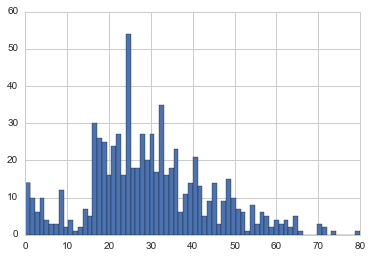

In [5]:
# plot ages of training data set, with NaN's removed
train_df['Age'].dropna().astype(int).hist(bins=70)
print 'Mean age = ',train_df['Age'].dropna().astype(int).mean()

# Let's see where they got on

In [6]:
train_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df['Embarked'].isnull().sum()

2

In [9]:
train_df["Embarked"].count()

889

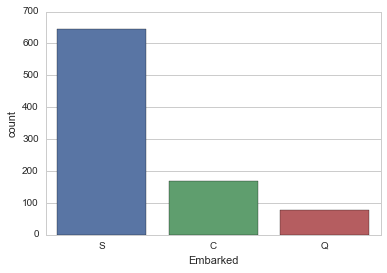

In [10]:
sns.countplot(x="Embarked",data=train_df)

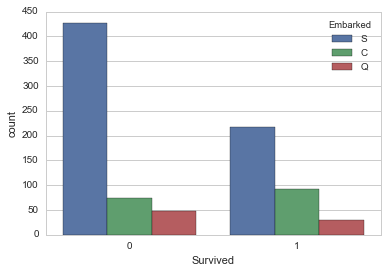

In [11]:
sns.countplot(x='Survived',hue='Embarked',data=train_df,order=[0,1])

## OK, so clearly there were more people who got on at S, and it seems their survival is disproportional.  Let's check that.

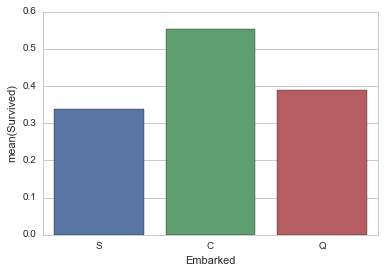

In [12]:
embark_survive_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_survive_perc,order=['S','C','Q'])

## Interesting, actually those from C had higher rate of survival.  So, knowing more people from your home town didn't help.

## Next, did how much they paid have an effect?

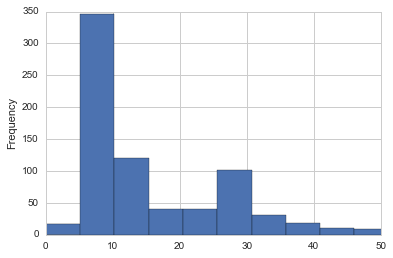

In [13]:
train_df['Fare'].astype(int).plot(kind='hist',bins=100, xlim=(0,50))

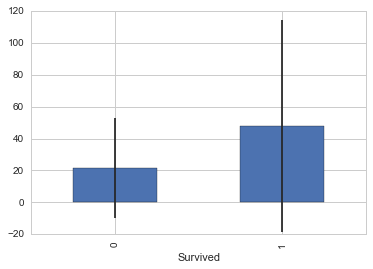

In [14]:
# get fare for survived & didn't survive passengers 
fare_not_survived = train_df["Fare"].astype(int)[train_df["Survived"] == 0]
fare_survived     = train_df["Fare"].astype(int)[train_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

## Before digging into how the ages factor in, let's take the advice of others and replace NaN's with random values

In [15]:
# get average, std, and number of NaN values in titanic_df
average_age_train   = train_df["Age"].mean()
std_age_train      = train_df["Age"].std()
count_nan_age_train = train_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
## ORIGINAL
rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
train_df['Age'][np.isnan(train_df["Age"])] = rand_1 ## Only way that works, but raises warnings


#df_rand = pd.DataFrame(rand_1)

# create random dummy dataframe
#dfrand = pd.DataFrame(data=np.random.randn(train_df.shape[0],train_df.shape[1]))
#dfrand.info()
#train_df[np.isnan(train_df["Age"])] = dfrand[np.isnan(train_df["Age"])]  ## DOESN"T WORK!!!

#
#train_df["Age"].fillna(value=rand_1, inplace=True)

#print df_rand
#train_df["Age"][np.isnan(train_df["Age"])] = df_rand[np.isnan(train_df["Age"])]

#train_df["Age"].isnull().sum()


/home/kmede/miniconda2/envs/ExoSOFTcondaEnv/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


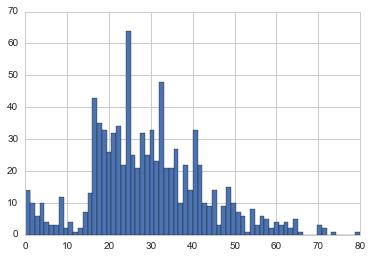

In [19]:
# replace NaN values with randoms
#train_df["Age"][np.isnan(train_df["Age"])] = rand_1
#train_df.loc[:,('Age')][np.isnan(train_df["Age"])] = rand_1
#train_df['Age'] = train_df['Age'].fillna(np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train))
#train_df["Age"]
train_df["Age"] = train_df["Age"].astype(int)

# plot new Age Values
train_df['Age'].hist(bins=70)
# Compare this to that from a few cells up for the raw ages with the NaN's dropped.  Not much different actually.

In [20]:
## Let's make a couple nice plots of survival vs age
# peaks for survived/not survived passengers by their age
"""
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
"""

'\nfacet = sns.FacetGrid(train_df, hue="Survived",aspect=4)\nfacet.map(sns.kdeplot,\'Age\',shade= True)\nfacet.set(xlim=(0, train_df[\'Age\'].max()))\nfacet.add_legend()\n'

In [21]:
# average survived passengers by age
"""
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
"""

'\nfig, axis1 = plt.subplots(1,1,figsize=(18,4))\naverage_age = train_df[["Age", "Survived"]].groupby([\'Age\'],as_index=False).mean()\nsns.barplot(x=\'Age\', y=\'Survived\', data=average_age)\n'